# Ministry of Production 
https://www.datosabiertos.gob.pe/group/ministerio-de-la-producci%C3%B3n

## Directory of MSME Companies by productive sector 2021 [Ministry of Production - PRODUCE] 
https://www.datosabiertos.gob.pe/dataset/directorio-de-empresas-mipyme-por-sector-productivo-ministerio-de-la-producci%C3%B3n-produce

### Dataset Description :
Directory of MSME companies in Peru, categorized by productive sector (Commerce, Manufacturing, Services). All the companies on this list are accredited by the National Superintendence of Customs and Tax Administration (SUNAT), that is, they have a RUC number. 

#### This dataset is characterized by: 
Sector, Ubigeo, CIIU

**Note :** MSME - Micro, Small & Medium Enterprises

MSMEs play a significant role in many economies, contributing to job creation, economic growth, and innovation. They often face unique challenges compared to larger corporations, such as access to finance, technology, and markets. However, they also offer several advantages, including agility, flexibility, and a close connection to their communities.

## Objective 
The objective for analyzing the "Directory of MSME Companies by productive sector 2021" dataset is to gain insights into the landscape of Micro, Small, and Medium Enterprises (MSMEs) in Lima, Peru. The analysis aims to understand the distribution of MSMEs across different productive sectors, assess their geographical concentration, identify key sectors driving economic activity, and explore opportunities for targeted interventions or support to enhance the MSME ecosystem. The goal is to provide actionable insights that can contribute to the improvement of Lima's economy and the overall quality of life for its residents.


## 1. Data Preprocessing:
- Loaded the dataset and selected the required columns.
- Renamed columns for better readability.
- Converted columns to the appropriate datatype format.
- Checked for null and duplicate values (none found).

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
data = pd.read_csv('MSME Business Directory 2021.csv', encoding='latin1', error_bad_lines=False)

C:\Users\l\AppData\Local\Temp\ipykernel_17536\3655254981.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('MSME Business Directory 2021.csv', encoding='latin1', error_bad_lines=False)
Skipping line 1369177: expected 11 fields, saw 12

Skipping line 1419120: expected 11 fields, saw 12

Skipping line 1466648: expected 11 fields, saw 12
Skipping line 1491389: expected 11 fields, saw 13

Skipping line 1581006: expected 11 fields, saw 12
Skipping line 1606979: expected 11 fields, saw 12

Skipping line 1671978: expected 11 fields, saw 12

Skipping line 1783218: expected 11 fields, saw 12
Skipping line 1813348: expected 11 fields, saw 12
Skipping line 1813376: expected 11 fields, saw 12
Skipping line 1818748: expected 11 fields, saw 12

Skipping line 1838677: expected 11 fields, saw 12
Skipping line 1894574: expected 11 fields, saw 12



In [30]:
data.head()

,ruc,razon_social,descripcion_ciiu3,ciiu3,departamento,provincia,distrito,ubigeo,sector,PERIODO,FECHA_PUBLICACION
0,10028320570,ZURITA GARCIA ANTONIO,OTROS TIPOS DE VENTA AL POR MENOR.,5239,PIURA,PAITA,PAITA,200501,COMERCIO,2021,20230510
1,10028320901,ZURITA GARGUREVICH ELIANA ELIZABETH,ENSEÑANZA PRIMARIA,8010,PIURA,PIURA,PIURA,200101,SERVICIO,2021,20230510
2,10028321690,GARCIA INFANTE SONIA RUTH,VTA. MIN. ALIMENTOS BEBIDAS TABACO.,5220,PIURA,PIURA,CASTILLA,200104,COMERCIO,2021,20230510
3,10028322076,TUME PINGO JOSE EDUARDO,OTRAS ACTIVIDADES EMPRESARIALES NCP.,7499,PIURA,PAITA,PAITA,200501,SERVICIO,2021,20230510
4,10028323111,NUNURA LORO ANGEL,TRANSPORTE DE CARGA POR CARRETERA.,6023,PIURA,SECHURA,BERNAL,200803,SERVICIO,2021,20230510


In [31]:
data.shape

(1985686, 11)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985686 entries, 0 to 1985685
Data columns (total 11 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   ruc                int64 
 1   razon_social       object
 2   descripcion_ciiu3  object
 3   ciiu3              int64 
 4   departamento       object
 5   provincia          object
 6   distrito           object
 7   ubigeo             int64 
 8   sector             object
 9   PERIODO            int64 
 10  FECHA_PUBLICACION  int64 
dtypes: int64(5), object(6)
memory usage: 166.6+ MB


In [33]:
data.columns

Index(['ruc', 'razon_social', 'descripcion_ciiu3', 'ciiu3', 'departamento',
       'provincia', 'distrito', 'ubigeo', 'sector', 'PERIODO',
       'FECHA_PUBLICACION'],
      dtype='object')

In [34]:
data.isnull().sum()

ruc                  0
razon_social         1
descripcion_ciiu3    0
ciiu3                0
departamento         0
provincia            0
distrito             0
ubigeo               0
sector               0
PERIODO              0
FECHA_PUBLICACION    0
dtype: int64

In [35]:
data.duplicated().sum()

0

In [36]:
# Imputing with a Default Value
data['razon_social'].fillna('Unknown', inplace=True)

In [37]:
data.isnull().sum()

ruc                  0
razon_social         0
descripcion_ciiu3    0
ciiu3                0
departamento         0
provincia            0
distrito             0
ubigeo               0
sector               0
PERIODO              0
FECHA_PUBLICACION    0
dtype: int64

In [38]:
# Mapping Spanish column names to English
column_mapping = {
    'ruc' : 'RUC',
    'razon_social' : 'Company_Name',
    'descripcion_ciiu3' : 'DESCRIPTION_CIIU' ,
    'ciiu3': 'CIIU',
    'departamento': 'Department', 
    'provincia': 'Province',
    'distrito': 'District',
    'ubigeo': 'UBIGEO',
    'sector': 'Sector',
    'PERIODO': 'PERIOD',
    'FECHA_PUBLICACION': 'PUBLICATION_DATE'
}

# Rename columns
data.rename(columns=column_mapping, inplace=True)

# Display the updated DataFrame
data.head()

,RUC,Company_Name,DESCRIPTION_CIIU,CIIU,Department,Province,District,UBIGEO,Sector,PERIOD,PUBLICATION_DATE
0,10028320570,ZURITA GARCIA ANTONIO,OTROS TIPOS DE VENTA AL POR MENOR.,5239,PIURA,PAITA,PAITA,200501,COMERCIO,2021,20230510
1,10028320901,ZURITA GARGUREVICH ELIANA ELIZABETH,ENSEÑANZA PRIMARIA,8010,PIURA,PIURA,PIURA,200101,SERVICIO,2021,20230510
2,10028321690,GARCIA INFANTE SONIA RUTH,VTA. MIN. ALIMENTOS BEBIDAS TABACO.,5220,PIURA,PIURA,CASTILLA,200104,COMERCIO,2021,20230510
3,10028322076,TUME PINGO JOSE EDUARDO,OTRAS ACTIVIDADES EMPRESARIALES NCP.,7499,PIURA,PAITA,PAITA,200501,SERVICIO,2021,20230510
4,10028323111,NUNURA LORO ANGEL,TRANSPORTE DE CARGA POR CARRETERA.,6023,PIURA,SECHURA,BERNAL,200803,SERVICIO,2021,20230510


**Note: CIIU stands for [CLASIFICACION INDUSTRIAL INTERNACIONAL UNIFORME] (International Standard Industrial Classification)**

In [39]:
# Retrieve only the rows that belongs to LIMA
df = data[(data['Department'] == 'LIMA') & (data['Province'] == 'LIMA')]
df

,RUC,Company_Name,DESCRIPTION_CIIU,CIIU,Department,Province,District,UBIGEO,Sector,PERIOD,PUBLICATION_DATE
9,10028324451,FLORES JUAREZ ROSA,OTRAS ACTIVID.DE TIPO SERVICIO NCP,9309,LIMA,LIMA,LA VICTORIA,150115,SERVICIO,2021,20230510
51,10028339688,GARCIA CASTILLO MEREIDA,OTROS TIPOS DE VENTA POR MENOR.,5259,LIMA,LIMA,COMAS,150110,COMERCIO,2021,20230510
52,10028339777,GUERRERO NEIRA MAXIMO ELEAZAR,VTA. MAY. ALIMENTOS BEBIDAS Y TABACO.,5122,LIMA,LIMA,LA VICTORIA,150115,COMERCIO,2021,20230510
75,10028347966,SULLON RAMIREZ CARLOS,VTA. MAY. PRODUCTOS TEXTILES.,5131,LIMA,LIMA,LA VICTORIA,150115,COMERCIO,2021,20230510
76,10028349136,SEMINARIO NUEZ GUILLERMO,VTA. MAY. OTROS PRODUCTOS INTERMEDIOS.,5149,LIMA,LIMA,CARABAYLLO,150106,COMERCIO,2021,20230510
...,...,...,...,...,...,...,...,...,...,...,...
1985634,10028303918,ALVA LLACSAHUANGA ELENA,VTA. MIN. OTROS PRODUCTOS EN ALMACEN.,5219,LIMA,LIMA,LIMA,150101,COMERCIO,2021,20230510
1985639,10028305236,LAO SIU JOSE BERNARDO ENRIQUE,ACTIV.DE ARQUITECTURA E INGENIERIA,7421,LIMA,LIMA,SAN BORJA,150130,SERVICIO,2021,20230510
1985655,10028308413,CUELLO CORDOVA LIDA AURORA,VTA. MAY. A CAMBIO DE UNA RETRIBUCION.,5110,LIMA,LIMA,SAN LUIS,150134,COMERCIO,2021,20230510
1985670,10028313956,GARCIA BAYONA JORGE ENRIQUE,FAB. OTROS PROD. TEXTILES NEOP.,1729,LIMA,LIMA,SAN LUIS,150134,MANUFACTURA,2021,20230510


In [40]:
df.dtypes

RUC                  int64
Company_Name        object
DESCRIPTION_CIIU    object
CIIU                 int64
Department          object
Province            object
District            object
UBIGEO               int64
Sector              object
PERIOD               int64
PUBLICATION_DATE     int64
dtype: object

In [41]:
df['PERIOD'] = pd.to_datetime(df['PERIOD'], format='%Y').dt.to_period('Y')

C:\Users\l\AppData\Local\Temp\ipykernel_17536\2225520929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PERIOD'] = pd.to_datetime(df['PERIOD'], format='%Y').dt.to_period('Y')


In [42]:
df.drop(columns=['Department','Province','PUBLICATION_DATE'], inplace=True)

C:\Users\l\AppData\Local\Temp\ipykernel_17536\333183936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Department','Province','PUBLICATION_DATE'], inplace=True)


In [43]:
df.Company_Name.nunique()

864452

In [44]:
df.DESCRIPTION_CIIU.nunique()

251

In [45]:
df.CIIU.nunique()

246

In [46]:
df.District.nunique()

43

In [47]:
df.Sector.nunique()

3

In [48]:
df.Sector.unique()

array(['SERVICIO', 'COMERCIO', 'MANUFACTURA'], dtype=object)

In [49]:
df.head()

,RUC,Company_Name,DESCRIPTION_CIIU,CIIU,District,UBIGEO,Sector,PERIOD
9,10028324451,FLORES JUAREZ ROSA,OTRAS ACTIVID.DE TIPO SERVICIO NCP,9309,LA VICTORIA,150115,SERVICIO,2021
51,10028339688,GARCIA CASTILLO MEREIDA,OTROS TIPOS DE VENTA POR MENOR.,5259,COMAS,150110,COMERCIO,2021
52,10028339777,GUERRERO NEIRA MAXIMO ELEAZAR,VTA. MAY. ALIMENTOS BEBIDAS Y TABACO.,5122,LA VICTORIA,150115,COMERCIO,2021
75,10028347966,SULLON RAMIREZ CARLOS,VTA. MAY. PRODUCTOS TEXTILES.,5131,LA VICTORIA,150115,COMERCIO,2021
76,10028349136,SEMINARIO NUEZ GUILLERMO,VTA. MAY. OTROS PRODUCTOS INTERMEDIOS.,5149,CARABAYLLO,150106,COMERCIO,2021


## 2. Exploratory data Analysis


### Industry Contribution Assessment:

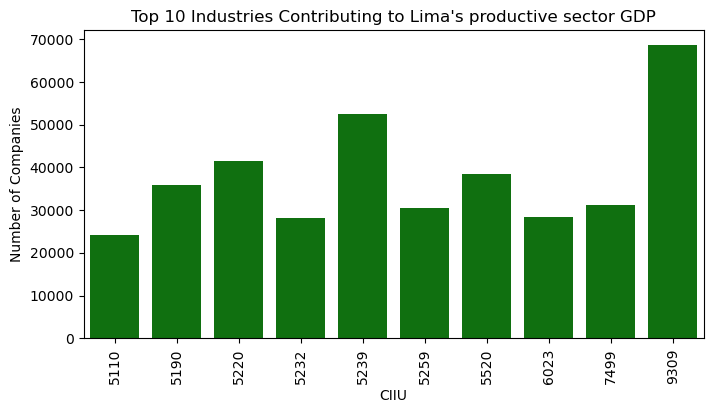

In [56]:
# 1. Identify key Idustries contributing the most to Lima's productive sector GDP
top_industries = df.groupby('CIIU')['Company_Name'].count().sort_values(ascending=False).head(10)

# Plotting the top contributing industries
plt.figure(figsize=(8, 4))
sns.barplot(x=top_industries.index, y=top_industries.values, color='green')
plt.title('Top 10 Industries Contributing to Lima\'s productive sector GDP')
plt.xlabel('CIIU')
plt.ylabel('Number of Companies')
plt.xticks(rotation=90)
plt.show()

The CIIU code 9309, representing "Other Service Activities NCP," has the highest number of companies, with 68,668 entities in Lima's productive sector. This indicates a significant presence of diverse service-oriented businesses.
Following closely, codes 5239, 5220, 5520, and 5190 also contribute substantially to Lima's GDP, showcasing a diverse mix of economic activities.


Top Industries contributing to Lima's GDP:
DESCRIPTION_CIIU
OTRAS ACTIVID.DE TIPO SERVICIO NCP         68668
OTROS TIPOS DE VENTA AL POR MENOR.         52597
VTA.  MIN. ALIMENTOS BEBIDAS TABACO.       41433
RESTAURANTES BARES Y CANTINAS.             38372
VTA. MAY. DE OTROS PRODUCTOS.              35974
OTRAS ACTIVIDADES EMPRESARIALES NCP.       31193
OTROS TIPOS DE VENTA POR MENOR.            30441
TRANSPORTE  DE CARGA POR CARRETERA.        28292
VTA. MIN. PRODUCTOS TEXTILES CALZADO.      28250
VTA.  MAY. A CAMBIO DE UNA RETRIBUCION.    24238
Name: RUC, dtype: int64


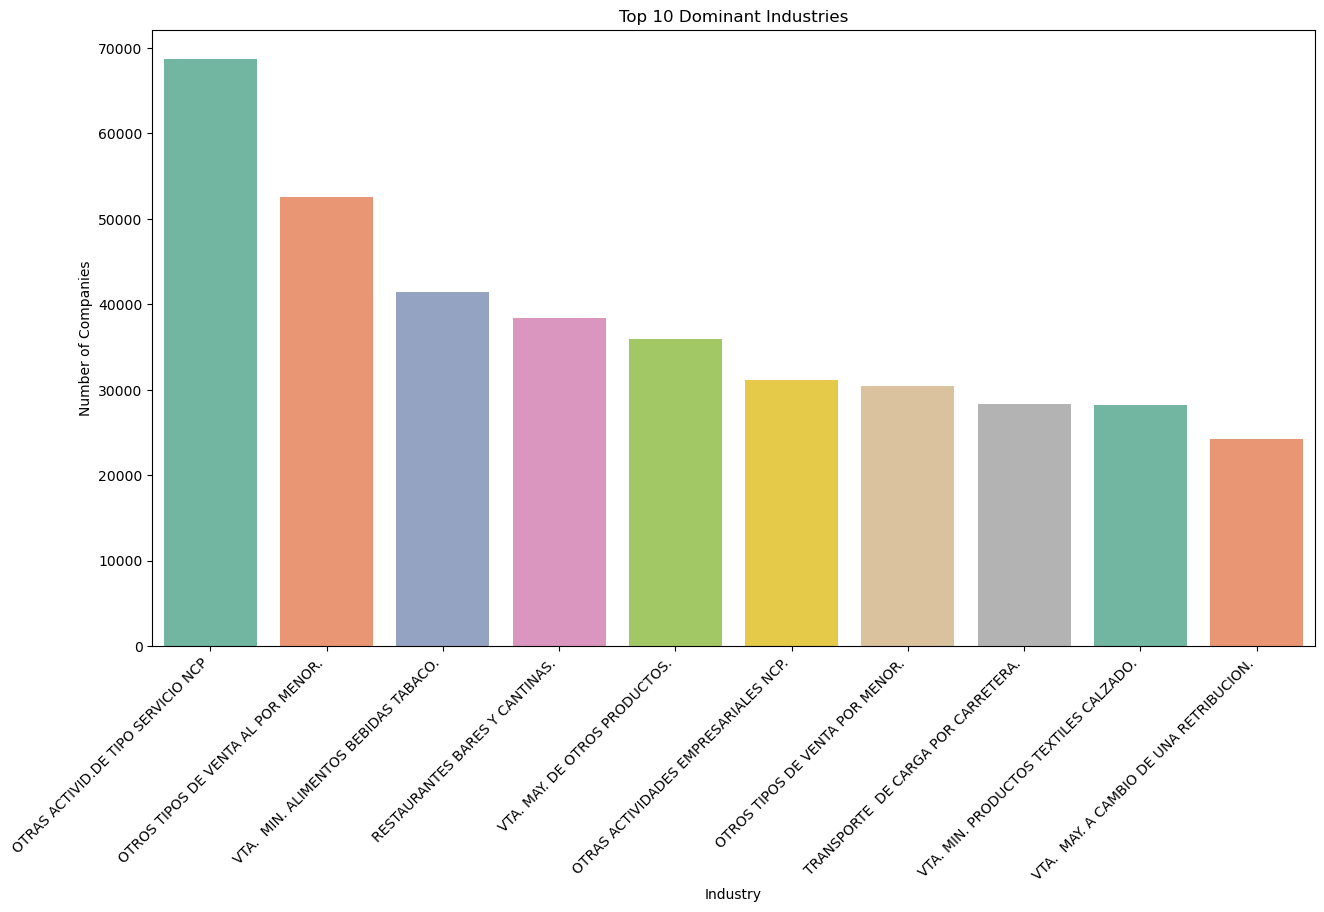

In [51]:
# 2.Identify industries within sectors that make the most significant contribution to Lima's GDP.
top_industries = df.groupby('DESCRIPTION_CIIU')['RUC'].count().sort_values(ascending=False).head(10)

print("\nTop Industries contributing to Lima's GDP:")
print(top_industries)

# To plot top 10 dominating industries
industry_counts = df['DESCRIPTION_CIIU'].value_counts().reset_index()
industry_counts.columns = ['Industry', 'Company_Count']

plt.figure(figsize=(15, 8))
sns.barplot(x='Industry', y='Company_Count', data=industry_counts.head(10), palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Dominant Industries')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.show()

"Other Service Activities NCP" (CIIU 9309) is the leading industry, with 68,668 companies, highlighting the importance of diverse service sectors.
Retail-related industries, including "Other Types of Retail Sales" (CIIU 5239) and "Retail Sale of Food, Beverages, and Tobacco" (CIIU 5220), follow closely, emphasizing the significance of consumer-focused businesses.
Restaurants, bars, and cafeterias (CIIU 5520) also play a substantial role, contributing significantly to Lima's GDP.

## Sectoral Distribution Analysis:

COMERCIO       393588
SERVICIO       377018
MANUFACTURA     94512
Name: Sector, dtype: int64


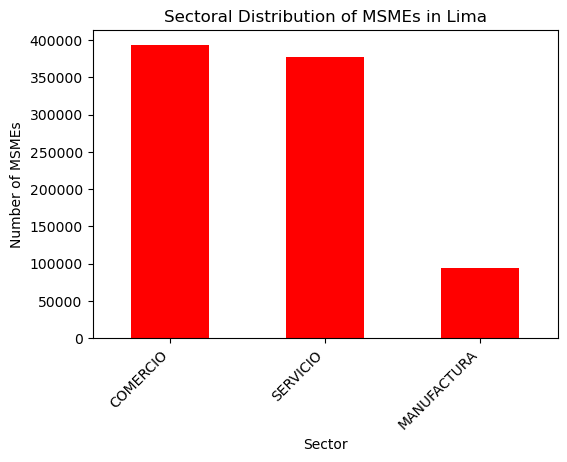

In [53]:
# Explore the distribution of MSMEs across different sectors such as Commerce, Manufacturing, and Services.

# Count the number of MSMEs in each sector
sector_distribution = df['Sector'].value_counts()

print(sector_distribution)

# Plot the sectoral distribution
plt.figure(figsize=(6, 4))
sector_distribution.plot(kind='bar', color='red')
plt.title('Sectoral Distribution of MSMEs in Lima')
plt.xlabel('Sector')
plt.ylabel('Number of MSMEs')
plt.xticks(rotation=45, ha='right')
plt.show()

Commerce (COMERCIO) is the predominant sector among MSMEs in Lima, with 393,588 entities. This signifies a strong presence of businesses involved in trade and retail.
Services (SERVICIO) closely follows Commerce, with 377,018 companies. The high number suggests a diverse array of service-oriented enterprises.
Manufacturing (MANUFACTURA) represents a significant but comparatively smaller sector, with 94,512 companies.

## Geographical Concentration Analysis:

Top 5 Districts with the Highest Number of Manufacturing Companies:
LIMA                      76899
SAN JUAN DE LURIGANCHO    60912
SAN MARTIN DE PORRES      57959
LA VICTORIA               53101
SANTIAGO DE SURCO         51397
Name: District, dtype: int64
Least 5 Districts with the lowest Number of Manufacturing Companies:
PUNTA HERMOSA          812
PUCUSANA               803
SAN BARTOLO            652
PUNTA NEGRA            490
SANTA MARIA DEL MAR    101
Name: District, dtype: int64


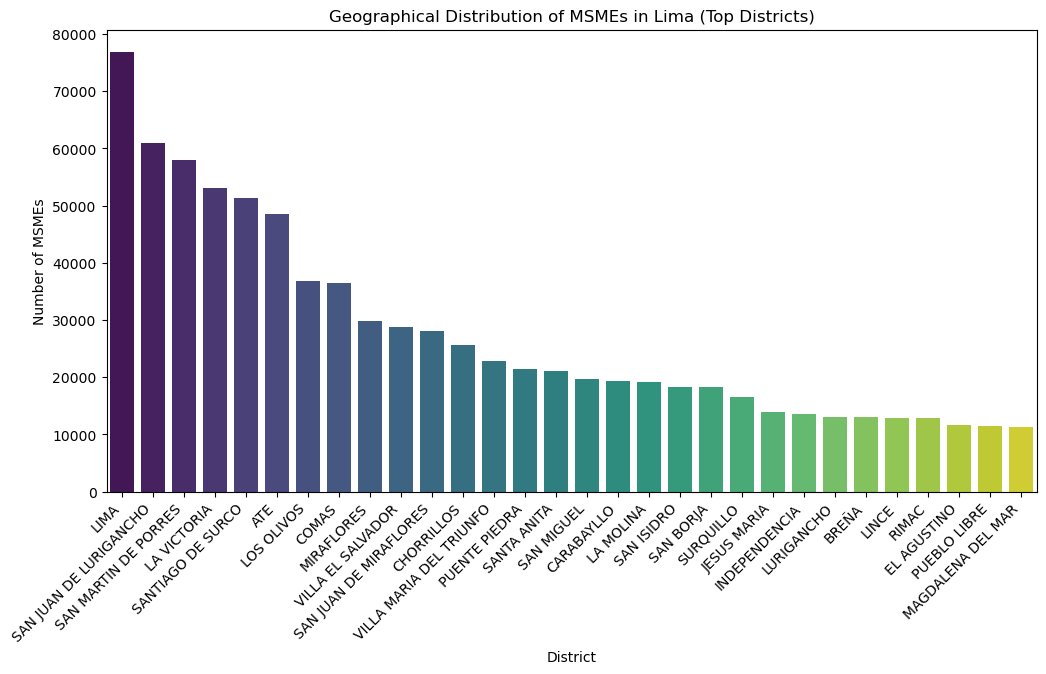

In [54]:
# Explore the geographical distribution of MSMEs companies within Lima (District-level analysis)

# Count the number of MSMEs in each district
district_distribution = df['District'].value_counts()

print("Top 5 Districts with the Highest Number of Manufacturing Companies:")
print(district_distribution.head()) 

print("Least 5 Districts with the lowest Number of Manufacturing Companies:")
print(district_distribution.tail())

# Identify districts with a high concentration of MSMEs 
high_concentration_districts = district_distribution[district_distribution > 10000]

# Plot the distribution of MSMEs across districts
plt.figure(figsize=(12, 6))
sns.barplot(x=high_concentration_districts.index, y=high_concentration_districts.values, palette='viridis')
plt.title('Geographical Distribution of MSMEs in Lima (Top Districts)')
plt.xlabel('District')
plt.ylabel('Number of MSMEs')
plt.xticks(rotation=45, ha='right')
plt.show()

Lima Province has a concentrated presence of MSMEs, with the highest numbers found in districts such as Lima, San Juan de Lurigancho, San Martin de Porres, La Victoria, and Santiago de Surco.
These districts, being commercial and populous, attract a substantial number of businesses, contributing to the economic vibrancy of Lima.

## 3. Skill Requirements Analysis :

### A. Commerce Sector (COMERCIO):

1. **Sales and Customer Service:**
   - Skills Needed: Effective communication, negotiation, and customer relationship management.
   - Skill Development Initiatives: Sales training programs, customer service workshops.

2. **Inventory Management:**
   - Skills Needed: Inventory tracking, demand forecasting, and supply chain management.
   - Skill Development Initiatives: Workshops on inventory management, supply chain optimization.

3. **Retail Operations:**
   - Skills Needed: Store management, merchandising, and point-of-sale (POS) systems.
   - Skill Development Initiatives: Retail operations courses, POS system training.

4. **Marketing and Promotion:**
   - Skills Needed: Digital marketing, branding, and promotional strategies.
   - Skill Development Initiatives: Marketing workshops, digital marketing courses.

### B. Services Sector (SERVICIO):

1. **Service Delivery:**
   - Skills Needed: Timely service delivery, quality assurance, and client satisfaction.
   - Skill Development Initiatives: Service excellence training, quality assurance programs.

2. **Customer Relations:**
   - Skills Needed: Building and maintaining customer relationships.
   - Skill Development Initiatives: Customer relations workshops, relationship management courses.

3. **Appointment Scheduling:**
   - Skills Needed: Efficient appointment scheduling and time management.
   - Skill Development Initiatives: Time management workshops, scheduling optimization.

4. **Service Quality Assurance:**
   - Skills Needed: Ensuring service quality standards.
   - Skill Development Initiatives: Quality assurance training, service quality workshops.

### C. Manufacturing Sector (MANUFACTURA):

1. **Production Processes:**
   - Skills Needed: Understanding manufacturing processes, workflow optimization.
   - Skill Development Initiatives: Training on modern production techniques, workflow efficiency.

2. **Quality Control:**
   - Skills Needed: Implementing quality control measures.
   - Skill Development Initiatives: Quality control courses, workshops on quality assurance.

3. **Equipment Operation:**
   - Skills Needed: Operating and maintaining manufacturing equipment.
   - Skill Development Initiatives: Equipment operation training, maintenance workshops.

4. **Safety and Compliance:**
   - Skills Needed: Ensuring workplace safety and compliance with industry regulations.
   - Skill Development Initiatives: Safety training programs, compliance workshops.

Tailoring skill development initiatives to the specific needs of each sector ensures that MSMEs receive targeted support for their unique challenges and opportunities. This approach contributes to the overall growth and resilience of the MSME landscape in Lima.